In [1]:
import sys
sys.path.append('..')
# %matplotlib notebook
%matplotlib inline

import math as m
import numpy as np
import scipy.signal as signal

import matplotlib
import matplotlib.pyplot as plt
from core import Core

# from global_var import COLORS


In [2]:
print(COLORS)
COLORS.append('#44DD55')

NameError: name 'COLORS' is not defined

In [3]:
COLORS += COLORS

NameError: name 'COLORS' is not defined

In [2]:
matplotlib.rc('font', family='serif') 
matplotlib.rc('font', serif='Palatino Linotype') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 20})

In [3]:
count = 1
COLORS = plt.cm.rainbow(np.linspace(0,1,count))


In [4]:
folder = r'C:\SPRUP_data_Jenda\2019_03_13_Jenda_microscopy\21_09_16_DG657_B2_5/'.replace('\\', '/')


for i in [1]:
    print(i)    
    name = 'raw_{:02d}_2'.format(i)
    core = Core(folder, name)
    core.crop()
    core.k = 10

    core.type = 'raw'
    core_raw_std = [np.std(core.frame(i)) for i in range(len(core))]
    core_raw_int = [np.average(core.frame(i)) for i in range(len(core))]

    print('raw ended')
    core.type = 'diff'
    core_diff_std = [np.std(core.frame(i)) for i in range(len(core))]
    core_diff_int = [np.average(np.abs(core.frame(i))) for i in range(len(core))]
    print('diff ended')
    
    
    np.save(folder + name + '_raw_int' + '.npy', core_raw_int)
    np.save(folder + name + '_raw_std' + '.npy', core_raw_std)
    
    np.save(folder + name + '_diff_int' + '.npy', core_diff_int)
    np.save(folder + name + '_diff_std' + '.npy', core_diff_std)
    
    np.save(folder + name + '_time' + '.npy', core._time_info[:,0])
    
    std = np.std(core._data_raw, axis = 2)
    np.save(folder + name + '_raw_std_px' + '.npy', np.average(std))

1
core 2: intensity: 20021.799712351592
core 2: average px: 0.18402389441499606
core 2: average px x area: 20021.79971235157
raw ended
diff ended


In [5]:
area = 1936 * 1216


In [12]:
folder = r'C:\SPRUP_data_Jenda\2019_03_13_Jenda_microscopy\21_09_16_DG657_B2_5/'.replace('\\', '/')



frame_time = [0.1046,]
frame_time = [f*10 for f in frame_time] # per 100 ms

ets = [12.5]
avg = [8]
ma = [60.6]
des = [
    'TM, run'
      ]



raw_int = []
raw_std = []
raw_std_px = []


diff_int = []
diff_std = []
time = []

depth = 32700

for i in range(1, count + 1):
    name = 'raw_{:02d}_2'.format(i)
    raw_int.append(np.load(folder + name + '_raw_int' + '.npy')*depth)
    raw_std.append(np.load(folder + name + '_raw_std' + '.npy')*depth)
    raw_std_px.append(np.load(folder + name + '_raw_std_px' + '.npy')*depth)
    
    
    diff_std.append(np.load(folder + name + '_diff_std' + '.npy')*depth)
    diff_int.append(np.load(folder + name + '_diff_int' + '.npy')*depth)
    time.append(np.load(folder + name + '_time' + '.npy'))    
    
    


In [13]:
correction = [frame_time[i] / ets[i] / avg[i] * 1000 for i in range(count)]
intensity = [np.average(raw_int[i])*avg[i]/frame_time[i] for i in range(count)]
e_count = [np.average(raw_int[i]) for i in range(count)]

print(intensity)
print(correction)
print(e_count)

[46023.56671028969]
[10.46]
[6017.581347370377]


In [14]:
print([int((e*avg[i]**-1)**0.5) for i, e in enumerate(e_count)])
print([int(r) for r in raw_std_px])

[27]
[141]


1.8122919612584738
[1.0]
[1.0]
[1.0]
--------------------
[0.002077848143300951]
[0.004557682014486228]
[0.023592223343308957]
[0.00526305183569291]


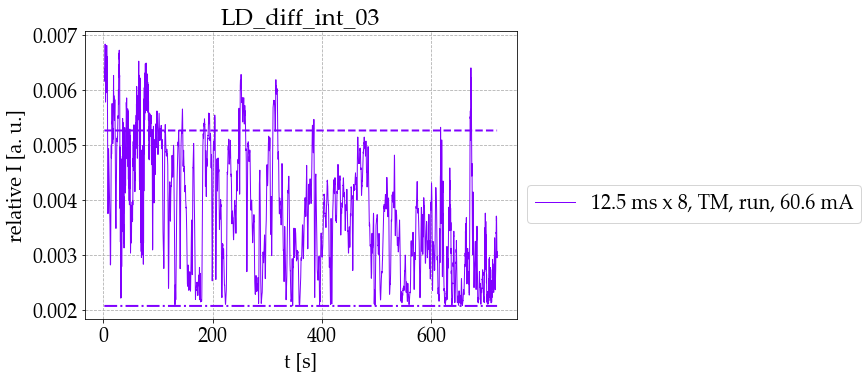

In [15]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1])
axes.grid(linestyle='--')

title = 'LD_diff_int_03'
axes.set_title(title)
axes.set_xlabel('t [s]')
# axes.set_ylabel('std [a. u.]')
# axes.set_ylabel('I [a. u.]')
axes.set_ylabel('relative I [a. u.]')



ii = []
levels = []
effective_noise_levels = []
nsr = []
nsr_std = []

for i in [1]:
    i -= 1
    
#     if i == 0:
#         variable = diff_int[i][20:]/e_count[1]
#     else:
        
#     variable = diff_int[i][20:]/e_count[i]
    variable = diff_std[i][20:]/e_count[i]
    

    
    axes.plot(
        time[i][20:], 
        variable, 
        linewidth=1, 
        label = '{} ms x {}, {}, {} mA'.format(ets[i], avg[i], des[i], ma[i]), 
#         label = '{} ms x {}, {}'.format(ets[i], avg[i], des[i]), 
        
        color = COLORS[i]
    )
    
    level = np.min(variable)
    
    variable_sorted = np.sort(variable)
    
    effective_noise_levels.append(variable_sorted[int(np.round(0.9*len(variable)))-1])
    
    
    
    
    
    level_avg = np.average(variable)
    
    print(level_avg/level)
    
    levels.append(level)
#     nsr.append(1/(e_count[i])**0.5)


    nsr.append((1/e_count[i]/avg[i])**0.5)
    
    nsr_std.append(raw_std_px[i]/e_count[i])
    
    axes.plot(
        time[i][20:], 
        effective_noise_levels[-1] * np.ones(len(time[i][20:])),      
        linewidth=2, 
        ls = '--', 
#         label = '{} ms x {}, {} mA, norm'.format(ets[i], avg[i], ma[i]), 
        color = COLORS[i]
    )
        
    axes.plot(
        time[i][20:], 
        level * np.ones(len(time[i][20:])),      
        linewidth=2, 
        ls = '-.', 
#         label = '{} ms x {}, {} mA, norm'.format(ets[i], avg[i], ma[i]), 
        color = COLORS[i]
    )
    

    
    ii.append(i)
    
print([l/levels[-1] for l in levels])
print([n/nsr[-1] for n in nsr])
print([n/nsr_std[-1] for n in nsr_std])

print('-'*20)

print(levels)
print(nsr)
print(nsr_std)
print(effective_noise_levels)

lgd = fig.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

# fig.savefig(folder + 'plots/' + title +'.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')    
